In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


In [2]:
df=pd.read_csv("Iris.csv")


In [3]:
y=list(df["species"])

In [4]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)
y=le.transform(y)
y


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
features = ["sepal_length","sepal_width","petal_length","petal_width"]
X = pd.get_dummies(df[features])
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
from sklearn.svm import SVC
svm_classifier = SVC(kernel='linear')


In [7]:
from sklearn.model_selection import KFold
k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [8]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score

# Define scoring metrics for multiclass
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'),
    'f1': make_scorer(f1_score, average='macro')
}

# Perform cross-validation
results = cross_validate(svm_classifier, X, y, cv=kf, scoring=scoring, return_train_score=False)

# Extract results for each metric
accuracy_scores = results['test_accuracy']
precision_scores = results['test_precision']
recall_scores = results['test_recall']
f1_scores = results['test_f1']

# Print scores for each fold
for i in range(len(accuracy_scores)):
    print(f"Fold {i+1}:")
    print(f"  Accuracy: {accuracy_scores[i]:.4f}")
    print(f"  Precision: {precision_scores[i]:.4f}")
    print(f"  Recall: {recall_scores[i]:.4f}")
    print(f"  F1-score: {f1_scores[i]:.4f}")

Fold 1:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
Fold 2:
  Accuracy: 1.0000
  Precision: 1.0000
  Recall: 1.0000
  F1-score: 1.0000
Fold 3:
  Accuracy: 0.9667
  Precision: 0.9630
  Recall: 0.9667
  F1-score: 0.9628
Fold 4:
  Accuracy: 0.9333
  Precision: 0.9524
  Recall: 0.9333
  F1-score: 0.9373
Fold 5:
  Accuracy: 0.9667
  Precision: 0.9722
  Recall: 0.9722
  F1-score: 0.9710


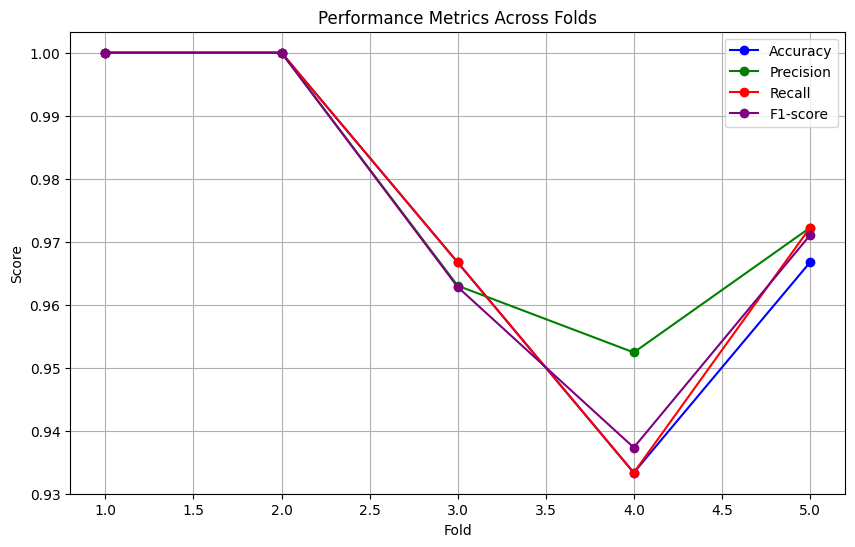

In [9]:
import matplotlib.pyplot as plt

# Data for each fold
folds = [1, 2, 3, 4, 5]
accuracy = [1.0000, 1.0000, 0.9667, 0.9333, 0.9667]
precision = [1.0000, 1.0000, 0.9630, 0.9524, 0.9722]
recall = [1.0000, 1.0000, 0.9667, 0.9333, 0.9722]
f1_score = [1.0000, 1.0000, 0.9628, 0.9373, 0.9710]

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(folds, accuracy, marker='o', label='Accuracy', color='blue')
plt.plot(folds, precision, marker='o', label='Precision', color='green')
plt.plot(folds, recall, marker='o', label='Recall', color='red')
plt.plot(folds, f1_score, marker='o', label='F1-score', color='purple')

# Adding labels and title
plt.xlabel('Fold')
plt.ylabel('Score')
plt.title('Performance Metrics Across Folds')
plt.legend()

# Display the plot
plt.grid(True)
plt.show()
